# CNN - Convolutional Neural Networks

Classification d'images: Classification binaire (prédire image de chien ou chat)

### Importation librairies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

### Construction CNN

In [3]:
# Initialiser le CNN
classifier = Sequential()

# Etape 1: Convolution, détection des features-> entrée: Image, sortie: features maps
classifier.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu'))

# Etape 2: Max polling, reduit la taille image tout en gardant les informations. 
# entrée: features maps, sortie: Pooled feature map
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Etape 3: Flattening, applatir les matrices pour obtenir des vecteurs verticaux
# entrée: Pooled feature map sortie: matrice une colonne
classifier.add(Flatten())

# Etape 4: Couche completement connecté
# Couche cachée
classifier.add(Dense(units=128, activation="relu"))

# Couche de sortie. Ici on a deux categories et une probabilité en sortie
classifier.add(Dense(units=1, activation = "sigmoid"))

### Complilation du modèle

Definir l'algorithm de descente du gradient, la fonction de perte et les metrics d'evalution

In [4]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
classifier.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


### Augmentation de données

Plus on a des données plus le modèle est performant. Permet aussi d'eviter le sur-entrainement

In [15]:
# ImageDataGenerator de Keras -> https://keras.io/api/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

# Transformation sur les images
train_datagen = ImageDataGenerator(
        rescale=1./255, # Mise à l'echelle: Standardization, chaque valeur de pixel compris entre 0 et 1
        shear_range=0.2, # Transvection
        zoom_range=0.2,
        horizontal_flip=True) # Rotation

# Data generator sur le jeu de test-> seulement la mise à l'echelle
test_datagen = ImageDataGenerator(rescale=1./255)


# Data generator sur le jeu de d'entraiment et de validation-> Toutes les transformations possibles

path_data_train = './dataset/training_set'
path_data_test = './dataset/test_set'
target_size= (200, 200) # 64*64 pour le premier modèle

def train_test_set(target_size):
    '''
    Fonction pour generer des données
    '''
    training_set = train_datagen.flow_from_directory(
        path_data_train,
        target_size=target_size, # taille nouvelle image
        batch_size=32, # lot d'oberservation pour l'algorithme de la descente du gradient
        class_mode='binary') # type de classification ici binaire.
    
    test_set = test_datagen.flow_from_directory(
        path_data_test,
        target_size=target_size,
        batch_size=32,
        class_mode='binary')
    return training_set, test_set

training_set, test_set = train_test_set(target_size)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Entrainement et évaluation du modèle

In [6]:
classifier.fit(
        training_set,
        steps_per_epoch=250,
        epochs=50,
        validation_data=test_set,
        validation_steps=800)


Epoch 1/50
250/250 [==============================] - 137s 550ms/step - loss: 0.6776 - accuracy: 0.5972 - val_loss: 0.5847 - val_accuracy: 0.6052
Epoch 2/50
250/250 [==============================] - 149s 596ms/step - loss: 0.5958 - accuracy: 0.6841 - val_loss: 0.4926 - val_accuracy: 0.6871
Epoch 3/50
250/250 [==============================] - 150s 601ms/step - loss: 0.5767 - accuracy: 0.6960 - val_loss: 0.5512 - val_accuracy: 0.6812
Epoch 4/50
250/250 [==============================] - 151s 605ms/step - loss: 0.5459 - accuracy: 0.7163 - val_loss: 0.5007 - val_accuracy: 0.7361
Epoch 5/50
250/250 [==============================] - 151s 603ms/step - loss: 0.5371 - accuracy: 0.7239 - val_loss: 0.6391 - val_accuracy: 0.7352
Epoch 6/50
250/250 [==============================] - 151s 603ms/step - loss: 0.5173 - accuracy: 0.7466 - val_loss: 0.6872 - val_accuracy: 0.7249
Epoch 7/50
250/250 [==============================] - 152s 607ms/step - loss: 0.5096 - accuracy: 0.7466 - val_loss: 0.6421 

On remarque un grand eccart entre la précision du jeu de test 77% et celle de l'entrainement 93%. Il s'agit probablement d'un surentrainment

### Ajustement et amelioration du modèle

Augemtation de la taille des images en entrée, Augmentation nombre d'epochs, Ajout de couches de convolution + max pooling, Ajout de couches entierement connectées + Dropout

In [7]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape=(200, 200, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Ajout 2nd couche de convolution + pooling
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Ajout 3nd couche de convolution + pooling
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Ajout 4em couche de convolution + pooling
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Ajout de couche entièrement connecté supplemetaire + Dropout 
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dropout(rate = 0.3))

classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dropout(rate = 0.3))

classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dropout(rate = 0.3))

# Couche de sortie
classifier.add(Dense(units=1, activation = "sigmoid"))

In [8]:
# Complilation
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)      

In [16]:
# Entrainement et evaluation
classifier.fit(
        training_set,
        steps_per_epoch=250,
        epochs=100,
        validation_data=test_set,
        validation_steps=800)

Epoch 1/100
250/250 [==============================] - 859s 3s/step - loss: 0.6925 - accuracy: 0.5165 - val_loss: 0.6897 - val_accuracy: 0.4984
Epoch 2/100
250/250 [==============================] - 858s 3s/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6850 - val_accuracy: 0.5731
Epoch 3/100
250/250 [==============================] - 858s 3s/step - loss: 0.6693 - accuracy: 0.5959 - val_loss: 0.5371 - val_accuracy: 0.6382
Epoch 4/100
250/250 [==============================] - 860s 3s/step - loss: 0.6417 - accuracy: 0.6436 - val_loss: 0.7074 - val_accuracy: 0.6182
Epoch 5/100
250/250 [==============================] - 858s 3s/step - loss: 0.6040 - accuracy: 0.6789 - val_loss: 0.5533 - val_accuracy: 0.6543
Epoch 6/100
250/250 [==============================] - 859s 3s/step - loss: 0.5618 - accuracy: 0.7194 - val_loss: 0.5195 - val_accuracy: 0.7253
Epoch 7/100
250/250 [==============================] - 859s 3s/step - loss: 0.5412 - accuracy: 0.7368 - val_loss: 0.5646 - val_accuracy:

250/250 [==============================] - 868s 3s/step - loss: 0.1296 - accuracy: 0.9492 - val_loss: 1.1687 - val_accuracy: 0.8686
Epoch 58/100
250/250 [==============================] - 867s 3s/step - loss: 0.1254 - accuracy: 0.9504 - val_loss: 0.3875 - val_accuracy: 0.8645
Epoch 59/100
250/250 [==============================] - 864s 3s/step - loss: 0.1229 - accuracy: 0.9555 - val_loss: 0.0984 - val_accuracy: 0.8797
Epoch 60/100
250/250 [==============================] - 865s 3s/step - loss: 0.1291 - accuracy: 0.9534 - val_loss: 0.2789 - val_accuracy: 0.8732
Epoch 61/100
250/250 [==============================] - 867s 3s/step - loss: 0.1148 - accuracy: 0.9564 - val_loss: 0.3470 - val_accuracy: 0.8674
Epoch 62/100
250/250 [==============================] - 868s 3s/step - loss: 0.1211 - accuracy: 0.9541 - val_loss: 0.5733 - val_accuracy: 0.8633
Epoch 63/100
250/250 [==============================] - 866s 3s/step - loss: 0.1152 - accuracy: 0.9578 - val_loss: 0.6673 - val_accuracy: 0.866

On obtient cette fois une précision de 95% sur le jeu d'entrainement et 87% sur le jeu de validation.

### Prédiction sur de nouvelles obervations

Convertir les images au meme format que celui definit dans le réseau initialement

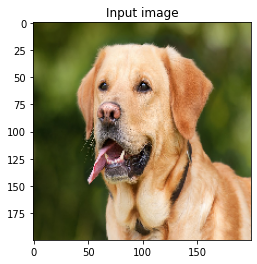

Resultat prédiction: dog


In [42]:
# Verifier les indices des classes
print(training_set.class_indices)

# Chemin image à prédire
img = './dataset/single_prediction/cat_or_dog_1.jpg'


def predict_image(image_path, target_size):
    test_image = image.load_img(img, target_size=target_size)
    plt.imshow(test_image)
    plt.title('Input image')
    plt.show()
    # Convertir les images en array . ici tableau 3D-> image RGB
    test_image = image.img_to_array(test_image)
    # Ajuter une autre dimension qui correspond au groupe d'appartenance de l'imge. Ici on a un seul groupe
    test_image = np.expand_dims(test_image, axis = 0)
    # Resultat prédiction
    result = classifier.predict(test_image)

    # Verifier les indices des classes
    #print(training_set.class_indices)

    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
        
    print("Resultat prédiction:", prediction)

predict_image(img, target_size)